In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [2]:
t= np.arange(0,2.1,0.1)
t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

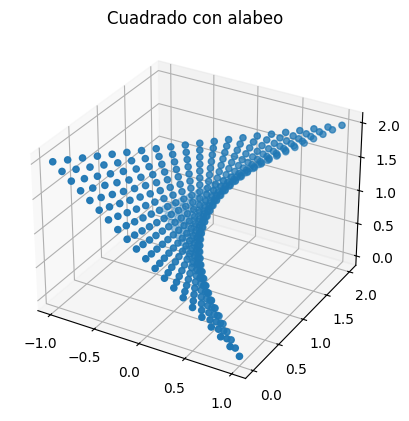

In [3]:
X=[]
for i in t:
  for j in t:
    x=(i-1)*(j-1)
    X.append([x,i,j])
X=np.array(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_title("Cuadrado con alabeo")
plt.show()


In [4]:
X2=X[:,1:]

Xm = X2.mean(axis=0)
xn = []
for i in range(len(X2)):
  a = X2[i] - Xm
  xn.append(a)

xn = np.array(xn)

Xv = xn @ xn.T

val, vec = np.linalg.eigh(Xv)
indices=np.argsort(val)[::-1]
vals = val[indices]
vecs = vec[:, indices]

EV = vals[:2]
VV = vecs[:, :2]

VV

array([[ 1.11214135e-01,  7.13064944e-19],
       [ 1.05653428e-01,  5.56070674e-03],
       [ 1.00092721e-01,  1.11214135e-02],
       [ 9.45320146e-02,  1.66821202e-02],
       [ 8.89713079e-02,  2.22428270e-02],
       [ 8.34106012e-02,  2.78035337e-02],
       [ 7.78498944e-02,  3.33642405e-02],
       [ 7.22891877e-02,  3.89249472e-02],
       [ 6.67284809e-02,  4.44856540e-02],
       [ 6.11677742e-02,  5.00463607e-02],
       [ 5.56070674e-02,  5.56070674e-02],
       [ 5.00463607e-02,  6.11677742e-02],
       [ 4.44856540e-02,  6.67284809e-02],
       [ 3.89249472e-02,  7.22891877e-02],
       [ 3.33642405e-02,  7.78498944e-02],
       [ 2.78035337e-02,  8.34106012e-02],
       [ 2.22428270e-02,  8.89713079e-02],
       [ 1.66821202e-02,  9.45320146e-02],
       [ 1.11214135e-02,  1.00092721e-01],
       [ 5.56070674e-03,  1.05653428e-01],
       [ 2.61444605e-17,  1.11214135e-01],
       [ 1.05653428e-01, -5.56070674e-03],
       [ 1.00092721e-01,  8.78940680e-19],
       [ 9.

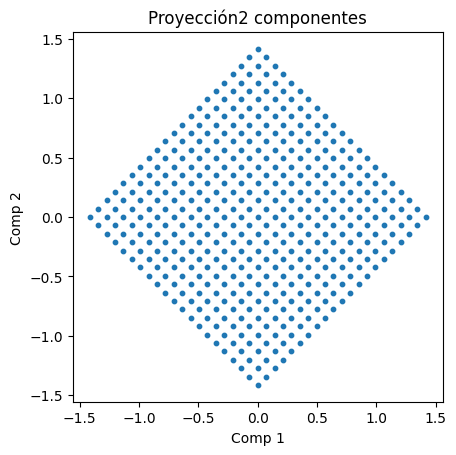

In [5]:
Y = VV * np.sqrt(EV)
plt.figure()
plt.scatter(Y[:,0], Y[:,1], s=10)
plt.title("Proyección2 componentes")
plt.gca().set_aspect('equal', 'box')
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')
plt.show()

In [6]:
 #Matriz de distancias
n = len(X)
D = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        D[i,j] = np.linalg.norm(X[i] - X[j])


D2 = D**2
D2

array([[0.  , 0.02, 0.08, ..., 7.28, 7.62, 8.  ],
       [0.02, 0.  , 0.02, ..., 6.9 , 7.24, 7.62],
       [0.08, 0.02, 0.  , ..., 6.56, 6.9 , 7.28],
       ...,
       [7.28, 6.9 , 6.56, ..., 0.  , 0.02, 0.08],
       [7.62, 7.24, 6.9 , ..., 0.02, 0.  , 0.02],
       [8.  , 7.62, 7.28, ..., 0.08, 0.02, 0.  ]], shape=(441, 441))

/home/pineda/GitHub/ESCOM_data-analysis/venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


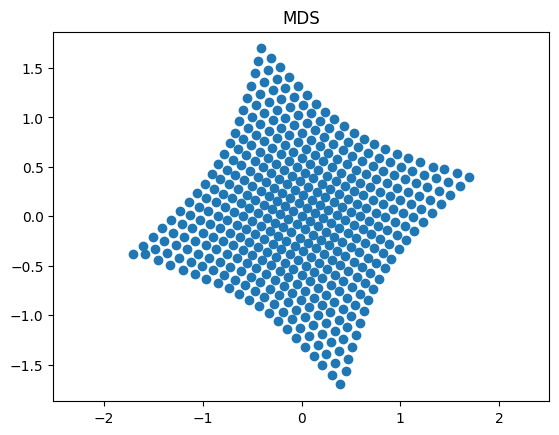

In [7]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
Yf = mds.fit_transform(D)

plt.scatter(Yf[:,0], Yf[:,1])
plt.title("MDS")
plt.axis("equal")
plt.show()

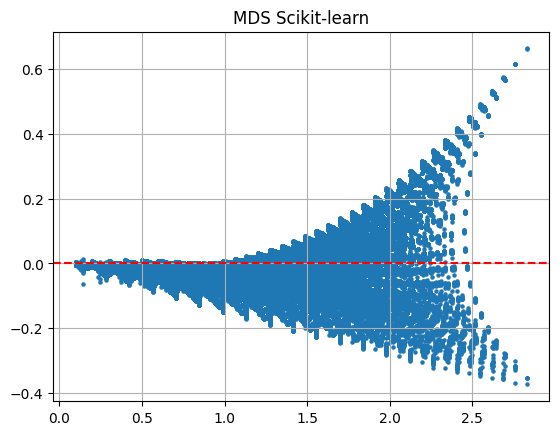

In [8]:
from sklearn.metrics import pairwise_distances

D_y = pairwise_distances(Yf)


i, j = np.triu_indices_from(D, k=1)

d_x = D[i, j]
d_y = D_y[i, j]
Delta = d_y - d_x


plt.scatter(d_x, Delta, s=5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("")
plt.ylabel("")
plt.title("MDS Scikit-learn")
plt.grid(True)
plt.show()

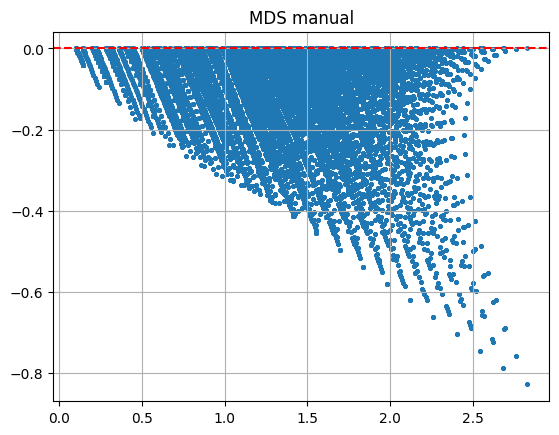

In [9]:
from sklearn.metrics import pairwise_distances

D_y = pairwise_distances(Y)


i, j = np.triu_indices_from(D, k=1)

d_x = D[i, j]
d_y = D_y[i, j]
Delta = d_y - d_x


plt.scatter(d_x, Delta, s=5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("")
plt.ylabel("")
plt.title("MDS manual")
plt.grid(True)
plt.show()